<h1>Importing opencv and keras libraries</h1>

In [43]:
import cv2
from keras.datasets import mnist

<h2>1.Loading training and test data from the mnist data set</h2>

In [2]:
(x_train,y_train),(x_test,y_test)=mnist.load_data()

<h2>2.Displaying one of the downloaded images</h2>

In [ ]:
cv2.imshow("h",x_train[0])
cv2.waitKey(0)
cv2.destroyAllWindows()

<h2>3.Randomly displays six of the training images in the dataset</h2>

In [4]:
import numpy as np
for x in range(0,6):
    random_int=np.random.randint(0,len(x_train))
    out="random "+str(x)
    cv2.imshow(out,x_train[random_int])
    cv2.waitKey(0)
    cv2.destroyAllWindows()

<h2>4.Reshaping the dataset using the numpy reshape library</h2>

In [5]:
x_train=x_train.reshape(60000,28,28,1)
x_test=x_test.reshape(10000,28,28,1)

<h2>5.Normalising our data</h2>

In [6]:
x_train=x_train/255
x_test=x_test/255
input_shape=(28,28,1)

<h2>6.Changing the data type to "float32"</h2>

In [7]:
x_train=x_train.astype('float32')
x_test=x_test.astype('float32')

<h2>7.One-Hot encoding the model as the classes of the output are greater than 2</h2>

In [8]:
from keras.utils import np_utils

y_train=np_utils.to_categorical(y_train)
y_test=np_utils.to_categorical(y_test)

<h2>8.Constructing the model </h2>

In [9]:
import keras
from keras.models import Sequential
from keras.layers import Dense,Dropout,Conv2D,MaxPool2D,Flatten
from keras import backend as k
from keras.optimizers import SGD
model=Sequential()
model.add(Conv2D(64,kernel_size=[3,3],
                activation='relu',
                input_shape=input_shape))
model.add(Conv2D(128,kernel_size=[3,3],
                activation='relu',
                ))
model.add(MaxPool2D(pool_size=[2,2]))
model.add(Dropout(0.25))
model.add(Flatten())
model.add(Dense(256,activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(10,activation='softmax'))



model.compile(loss='categorical_crossentropy',
             optimizer=SGD(0.01),
             metrics=['accuracy'])


<h2>9.Summary of the model</h2>

In [10]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 26, 26, 64)        640       
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 24, 24, 128)       73856     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 12, 12, 128)       0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 12, 12, 128)       0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 18432)             0         
_________________________________________________________________
dense_1 (Dense)              (None, 256)               4718848   
_________________________________________________________________
dropout_2 (Dropout)          (None, 256)               0         
__________

<h2>10.Compiling and Training the model</h2>

In [11]:
batch_size=32
epochs=10
history=model.fit(x_train,
                 y_train,
                 batch_size=batch_size,
                 epochs=epochs,
                 verbose=1,
                 validation_data=(x_train,y_train))

score=model.evaluate(x_test,y_test,verbose=0)
print("Test Loss",score[0])
print("Test accuracy",score[1])

Train on 60000 samples, validate on 60000 samples
Epoch 1/10
60000/60000 [==============================] - 20s 325us/step - loss: 0.4932 - acc: 0.8499 - val_loss: 0.1975 - val_acc: 0.9413
Epoch 2/10
60000/60000 [==============================] - 12s 196us/step - loss: 0.2349 - acc: 0.9295 - val_loss: 0.1305 - val_acc: 0.9616
Epoch 3/10
60000/60000 [==============================] - 12s 195us/step - loss: 0.1830 - acc: 0.9441 - val_loss: 0.1016 - val_acc: 0.9707
Epoch 4/10
60000/60000 [==============================] - 12s 197us/step - loss: 0.1497 - acc: 0.9552 - val_loss: 0.0805 - val_acc: 0.9761
Epoch 5/10
60000/60000 [==============================] - 12s 196us/step - loss: 0.1231 - acc: 0.9636 - val_loss: 0.0680 - val_acc: 0.9801
Epoch 6/10
60000/60000 [==============================] - 12s 199us/step - loss: 0.1057 - acc: 0.9677 - val_loss: 0.0574 - val_acc: 0.9827
Epoch 7/10
60000/60000 [==============================] - 12s 198us/step - loss: 0.0907 - acc: 0.9721 - val_loss: 0.

<h2>11.Plotting the loss charts</h2>

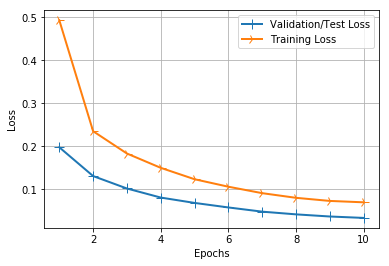

In [14]:
# Plotting our loss charts
import matplotlib.pyplot as plt

history_dict = history.history

loss_values = history_dict['loss']
val_loss_values = history_dict['val_loss']
epochs = range(1, len(loss_values) + 1)

line1 = plt.plot(epochs, val_loss_values, label='Validation/Test Loss')
line2 = plt.plot(epochs, loss_values, label='Training Loss')
plt.setp(line1, linewidth=2.0, marker = '+', markersize=10.0)
plt.setp(line2, linewidth=2.0, marker = '4', markersize=10.0)
plt.xlabel('Epochs') 
plt.ylabel('Loss')
plt.grid(True)
plt.legend()
plt.show()

<h2>12.Plotting the accuracy chart</h2>

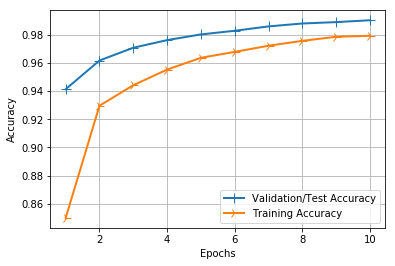

In [15]:
# Plotting our accuracy charts
import matplotlib.pyplot as plt

history_dict = history.history

acc_values = history_dict['acc']
val_acc_values = history_dict['val_acc']
epochs = range(1, len(loss_values) + 1)

line1 = plt.plot(epochs, val_acc_values, label='Validation/Test Accuracy')
line2 = plt.plot(epochs, acc_values, label='Training Accuracy')
plt.setp(line1, linewidth=2.0, marker = '+', markersize=10.0)
plt.setp(line2, linewidth=2.0, marker = '4', markersize=10.0)
plt.xlabel('Epochs') 
plt.ylabel('Accuracy')
plt.grid(True)
plt.legend()
plt.show()

<h2>13.Saving the model</h2>

In [16]:
model.save("mnist_simple_cnn_10_Epochs.h5")
print("Model Saved")

Model Saved


<h2>14.Loading the saved model</h2>
<p>The trained model has also been uploaded</

In [18]:
from keras.models import load_model
classifier = load_model('mnist_simple_cnn_10_Epochs.h5')

<h2>15.Testing the model with random inputs from the test dataset</h2>

In [19]:
import cv2
import numpy as np


def draw_test(name, pred, input_im):
    BLACK = [0,0,0]
    expanded_image = cv2.copyMakeBorder(input_im, 0, 0, 0, imageL.shape[0] ,cv2.BORDER_CONSTANT,value=BLACK)
    expanded_image = cv2.cvtColor(expanded_image, cv2.COLOR_GRAY2BGR)
    cv2.putText(expanded_image, str(pred), (152, 70) , cv2.FONT_HERSHEY_COMPLEX_SMALL,4, (0,255,0), 2)
    cv2.imshow(name, expanded_image)


for i in range(0,10):
    rand = np.random.randint(0,len(x_test))
    input_im = x_test[rand]

    imageL = cv2.resize(input_im, None, fx=4, fy=4, interpolation = cv2.INTER_CUBIC)
    input_im = input_im.reshape(1,28,28,1) 
    
    ## Get Prediction
    res = str(classifier.predict_classes(input_im, 1, verbose = 0)[0])

    draw_test("Prediction", res, imageL) 
    cv2.waitKey(0)

cv2.destroyAllWindows()

<h2>16.Testing model with custom picture</h2>
<p>"test_6.png" file has also been uploaded"</p>

In [21]:
im=cv2.imread("test_6.png")
cv2.imshow("test",im)
cv2.waitKey(0)
cv2.destroyAllWindows()

<h2>17.Reshaping the model to fit the input shape of the trained model</h2>

In [38]:
resized = cv2.resize(im, (28,28), interpolation = cv2.INTER_AREA)
resized=cv2.cvtColor(resized,cv2.COLOR_BGR2GRAY)
print(resized.shape)
resize=resized.reshape(1,28,28,1)

(28, 28)


<h2>18.Finally predicting the output with the model</h2>

In [46]:
res = str(classifier.predict_classes(resize, 1, verbose = 0))
print(res)

[6]
